# Машинное обучение, DS-поток, осень 2022
## Задание 3.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 30 баллов;
* Задача 3 &mdash; 70 баллов;
* Задача 4 &mdash; 80 баллов.

----

$\huge{Изменения}$

3) Добавил комментарий к графику о влиянии параметров регуляризации
3) Добавил вывод к общему сравнению моделей
3) Стал передавать в Pypelyne  не стандартизированные данные.
3) вывел оптимальные гиперпараметры

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from numpy import linalg as LA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor

---
## Задача 1.

Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор для Ridge-регрессии. Что можно сказать о влиянии параметра регуляризации?

Не совсем понятно зачем здесь проксимальный оператор, так как все галдко. Ну ладно

![title](1.jpeg)

Параметр регуляризации всегда сдвигает немного наш поиск, что увеличивает влияние градиента предыдущего шага

---
## Задача 2.

Исследуем Elastic-регрессию.

**1.** Визуализируйте множество, которое ограничивает коэффициенты в Elastic-регрессии.

![title](2.png)

**2.** Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор.

Какой вы можете видеть эффект при изменении параметра регуляризации и в чем
его отличие от лассо-регрессии?

**3.** Выпишите формулы для градиентного и стохастического спуска

---
## Задача 3.

Вам предлагается сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://dasl.datadescription.com/datafile/cost-of-living-2018/?_sfm_cases=539+541">`cost of living 2018`</a>, в которых используйте следующие столбцы:
* `City` &mdash; город, данные для которого приводятся.
* `Cost of Living Index` &mdash; является относительным показателем цен на потребительские товары, включая продукты, рестораны, транспорт и коммунальные услуги. Cost of Living Index не включает расходы на проживание, такие как аренда или ипотека. Если город имеет индекс стоимости жизни 120, это означает, что Numbeo оценивает его на 20% дороже, чем Нью-Йорк.

* `Rent Index` &mdash; это оценка цен на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, Numbeo оценивает, что цена аренды в этом городе в среднем на 20% меньше, чем цена в Нью-Йорке.

* `Cost of Living Plus Rent Index` &mdash; это оценка цен на потребительские товары, включая арендную плату, по сравнению с Нью-Йорком.

* `Restaurant Price Index` &mdash; сравнение цен на блюда и напитки в ресторанах и барах по сравнению с Нью-Йорк.

* `Local Purchasing Power Index` &mdash; показывает относительную покупательную способность при покупке товаров и услуг в данном городе за среднюю заработную плату в этом городе. Если внутренняя покупательная способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой по Нью-Йорку.

* `Groceries Index` &mdash; это оценка цен на продукты в городе по сравнению с Нью-Йорком. Для расчета этого раздела Number использует веса товаров в разделе "Рынки" для каждого города.

In [2]:
data = pd.read_csv('cost-of-living-2018.txt', sep='\t')
data = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
    'Groceries Index'
]]
data.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Restaurant Price Index,Local Purchasing Power Index,Groceries Index
0,145.43,110.87,128.76,158.75,112.26,143.47
1,141.25,66.14,105.03,135.76,142.70,149.86
2,134.83,71.70,104.38,129.74,130.96,138.98
3,130.68,49.68,91.61,127.22,139.01,127.54
4,128.03,43.57,87.30,119.48,112.71,132.70


**1.** Задача заключается в построении предсказания `Groceries Index` по известным значениям остальных параметров. Разделите данные на признаки $X$ и таргет $y$.

In [3]:
X = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index']]
y = data['Groceries Index']

Разбейте данные на обучающую и тестирующие выборки в соотношении 7:3 с помощью `train_test_split`</a> из sklearn. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** Большое отличие в признаках скорее всего приведет к большому отличию в параметре $\hat{\theta}$. Что в свою очередь привелет к неоправданному увеличению регуляризационного параметра.

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, **обученный на обучающей выборке**.

In [5]:
scaler = StandardScaler()
X_train_standart = scaler.fit_transform(X_train)

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Для Elastic также исследуйте зависимость от параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

Кажеться, что для подбора гиперпараметров надо использовать валидационную выборку, ну ладно

Скопипастим код с семинара

In [6]:
def draw_track(model, X, y, log_min, log_max, num, title='', figsize=(12, 6), flag=False):
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    :param model: модель
    :param X: регрессоры
    :param y: отклик
    :param log_min: десятичный логарифм 
        минимального значения коэффициента регуляризации
    :param log_max: десятичный логарифм 
        максимального значения коэффициента регуляризации
    :param num: количество элементов в сетке для коэффициента регуляризации
    :param title: заголовок графика
    :param figsize: размер полотна
    """
    
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            # равномерно распределим alpha по обоим коэффициентам
            if (not flag):
                a *= 3/2
                model.set_params(alpha=a)
            else:
                model.set_params(l1_ratio=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        coefs.append(model.coef_)

    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    if (not flag):
        plt.xlabel('alpha', fontsize=19)
    else:
        plt.xlabel('l1_ration', fontsize=19)        
    plt.ylabel('weights', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=15)
    plt.axis('tight')
    plt.show()

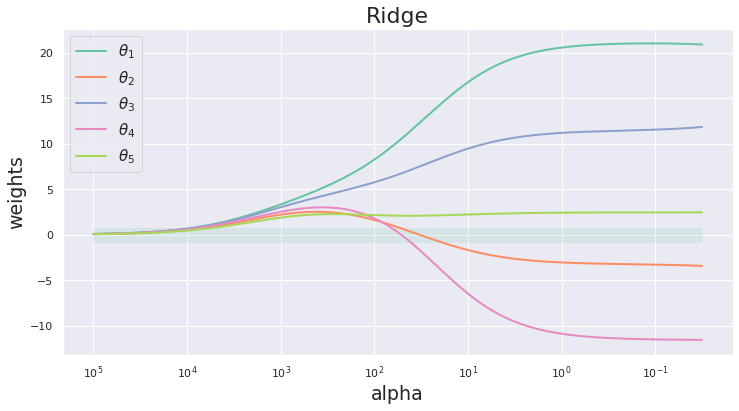

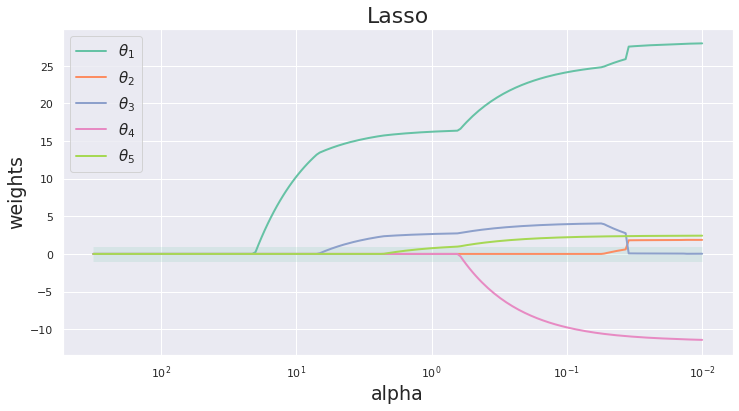

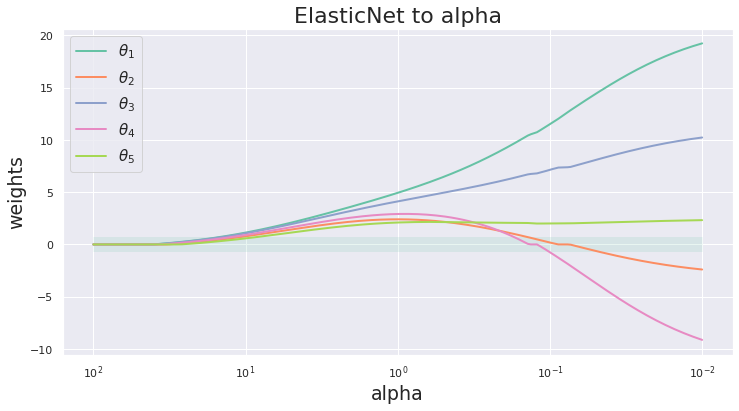

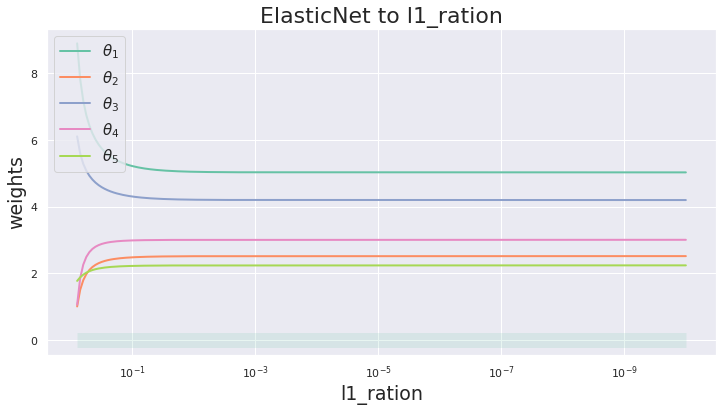

In [7]:
draw_track(Ridge(fit_intercept=False), X_train_standart, y_train, -1.5, 5, 200, 
           title='Ridge')
draw_track(Lasso(fit_intercept=False), X_train_standart, y_train, -2, 2.5, 200, 
           title='Lasso')
draw_track(ElasticNet(fit_intercept=False, l1_ratio=1/3, max_iter=2000), X_train_standart, y_train, -2, 2, 200, 
           title='ElasticNet to alpha')
draw_track(ElasticNet(fit_intercept=False, alpha=1, max_iter=500000), X_train_standart, y_train, -10, -0.1, 200, 
           title='ElasticNet to l1_ration', flag=True)

Как видно, при слишком больших значениях параметра веса стремяться к нулю. Видно, что в Elastic и Ridge это происходит достаточно плавно, в то время как в Lasso скочко образно.

Расчитайте индекс обусловленности для МНК-решения. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии. 

In [8]:
X = X_train_standart.T @ X_train_standart
eig = LA.eig(X)[0]
(max(eig)/min(eig))**0.5

13000.164555972204

Очевидно, данные мультиколлинеарны. Посмотрим на зависимость индекса обусловленности для Ridge

Какие-либо изменения параметров Ridge идут с 1 до $10^3$. 

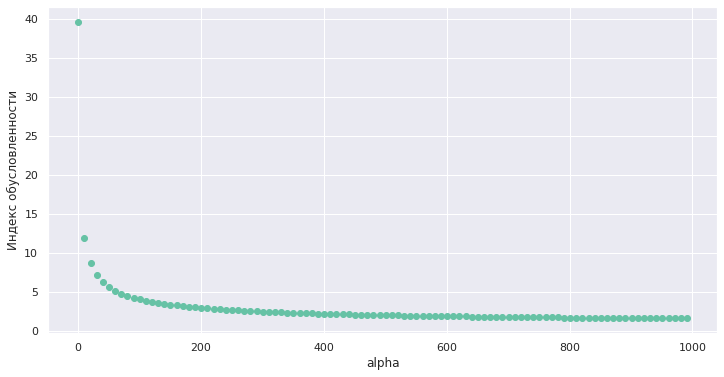

In [9]:
result = list()
for alpha in range(1, 1000, 10):
    eig = LA.eig(X + np.eye(X.shape[0]) * alpha)[0]
    result.append([alpha, (max(eig)/min(eig))**0.5])
result = np.array(result).T
plt.figure(figsize = (12, 6))
plt.scatter(result[0], result[1])
plt.xlabel("alpha")
plt.ylabel("Индекс обусловленности")
plt.show()

Понятно, что при $\alpha > 50$ проблем почти нет

**3.** На обучающей выборке с помощью поиска по сетке определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE).

*Замечание.* Не забудьте, что при стандартизации была использована вся обучающая выборка, а внутри кросс-валидации на каждой итерации рассматривается своя валидационная выборка, которая не должна стандартизироваться по данным, посчитанным частично на ней самой. Вам может помочь [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Используйте его в качестве аргумента model

In [10]:
first_model = Pipeline(steps=[('Normolise', StandardScaler()), ('model', Ridge())])
second_model = Pipeline(steps=[('Normolise', StandardScaler()), ('model', Lasso())])
third_model = Pipeline(steps=[('Normolise', StandardScaler()), ('model', ElasticNet())])

Основывваясь на графиках. Поиск в Ridge надо проводить $[1, 10^3]$. В Lasso от $[10^{-2}, 10^2]$. В ElasticNet $\alpha \in [10^{-2}, 10], l1ration \in [10^{-1}, 0,99]$

In [18]:
parameters_grid_first = {'model__alpha' : np.linspace(1, 1000, num=10000)}
parameters_grid_second = {'model__alpha' : np.linspace(0.01, 100, num=10000)}
parameters_grid_third = {'model__alpha' : np.linspace(0.1, 0.99, num=100), 'model__l1_ratio' : np.linspace(0.1, 0.99, num=100)}
ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

In [15]:
gs_first = GridSearchCV(estimator=first_model, param_grid = parameters_grid_first, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10, error_score='raise')
gs_second = GridSearchCV(estimator=second_model, param_grid = parameters_grid_second, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10, error_score='raise')
gs_third = GridSearchCV(estimator=third_model, param_grid = parameters_grid_third, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10, error_score='raise')

In [16]:
gs_first.fit(X_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('Normolise', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([   1.        ,    1.09990999,    1.19981998, ...,  999.80018002,
        999.90009001, 1000.        ])},
             scoring='neg_mean_squared_error', verbose=10)

In [17]:
gs_second.fit(X_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('Normolise', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.000e-02, 2.000e-02, 3.000e-02, ..., 9.998e+01, 9.999e+01,
       1.000e+02])},
             scoring='neg_mean_squared_error', verbose=10)

In [19]:
gs_third.fit(X_train, y_train)

Fitting 5 folds for each of 100000 candidates, totalling 500000 fits


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('Normolise', StandardScaler()),
                                       ('model', ElasticNet())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([0.1       , 0.10089089, 0.10178178, 0.10267267, 0.10356356,
       0.10445445, 0.10534535, 0.10623624, 0.10712713, 0.10801802,
       0.10890891, 0.1097998 , 0.11069069, 0.11158158, 0.11247247,
       0.11336336, 0.11425425, 0.11514515, 0...
       0.72929293, 0.73828283, 0.74727273, 0.75626263, 0.76525253,
       0.77424242, 0.78323232, 0.79222222, 0.80121212, 0.81020202,
       0.81919192, 0.82818182, 0.83717172, 0.84616162, 0.85515152,
       0.86414141, 0.87313131, 0.88212121, 0.89111111, 0.90010101,
       0.90909091, 0.91808081, 0.92707071, 0.93606061, 0.94505051,
       0.9540404 , 0.9630303 , 0.9720202 , 0.9810101 , 0.99      ])},
             scoring='neg_mean_squared_error', verbose=10)

На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

In [24]:
first_predict = gs_first.best_estimator_.predict(X_test)
second_predict = gs_second.best_estimator_.predict(X_test)
third_predict = gs_third.best_estimator_.predict(X_test)

In [25]:
print("Для Range MSE = ", MSE(first_predict, y_test))
print("Для Lasso MSE = ", MSE(second_predict, y_test))
print("Для Elastic Net MSE = ", MSE(third_predict, y_test))

Для Range MSE =  33.78803460091683
Для Lasso MSE =  33.54804854355345
Для Elastic Net MSE =  34.34330331524713


Результат примерно одинаковый. 

**4.** Сделайте общий вывод по задаче.

**Вывод:**  Результат у каждой можели примерно одинаковый. Скорее всего это связано с тем, что мы хорошо предподгатовили данные. Так же это говорит о том, что важно что бы была хоть какая-то регуляризация. Все равно какая. 

## Задача 4.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс, например, в `GridSearchCV`.

**1.** Задача оптимизации для регрессии Хьбера выглядит следующим образом:
$$\large{\sum_{i=1}^n R(Y_i - x_i^T\theta) \rightarrow \min_\theta},$$
где $R(x) = \frac{x^2}{2} I\{|x| < c\} + c (|x| - \frac{c}{2})I\{|x| < c\},$ &mdash; функция потерь Хьюбера.

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

На лицо дифференцирование сложной функции. Сначало найдем $\nabla R(x)$. Так как функция из $R -> R$ это обычная производная. Тогда $\nabla R(x) = x \cdot I\{|x| < c\} + c\cdot sign(x)I\{|x| < c\}$. Теперь осталось посчитать $\nabla (Y_i - x_i^T\cdot\theta) = -x_i$. Тогда градиент целевой функции это $\nabla F = \sum_{i=1}^n -x_i\cdot (Y_i - x_i^T\cdot\theta \cdot I\{|Y_i - x_i^T\cdot\theta| < c\} + c\cdot sign(Y_i - x_i^T\cdot\theta)I\{|Y_i - x_i^T\cdot\theta| < c\})$. Тогда формула для градиентного спуска $\hat{\theta}_{n+1} = \hat{\theta}_n - \eta\nabla F$

Так чем же она хороша? ...

Если нам повезло, и аргумент функции хьюберта находиться в пределах нуля, тоесть то, чего мы хотим от линейной регресии, то выбросы при оптимизации учитываться не будут. Однако если аргумент не достаточно мальникий, то мы поймали попадем в ноль и с него не сдвинимся. Однако, чтобы попасть в ноль нам надо преодалеть сопративление параболы. Хитрая фигня. Я бы сначало использовал обычную регрессию, чтобы примерно оценить тетта, а потом этой бы допиливал и уточнял. 

**2.** Реализуем теперь класс

In [21]:
class HuberRegression(BaseEstimator):
    '''
    Класс, реализующий линейную регрессию, используя функцию потерь Хьюбера.
    '''
    
    def __init__(self, c=15, fit_intercept=True, max_iter=10000, eta=0.1):
        '''
        :param c: константа c из определения функции потерь Хьюбера
        :param fit_intercept: добавлять ли константный признак
        :param max_iter: макс. количество итераций процедуры оптимизации
        '''
        
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        self.eta = eta

    def grad_foo_of_lost_Huber(self, x):
        if (abs(x) > self.c):
            return 0
        if (x == 0):
            return 0
        return x + self.c * (x/abs(x))
    
    def step_of_gradient(self, theta_n, X, y):
        helper = y - X@theta_n
        for i in range(len(helper)):
            helper[i] = self.grad_foo_of_lost_Huber(helper[i])
        return theta_n + self.eta * X.T @ helper
    
    def fit(self, X, y):
        '''
        Функция обучения модели.
        
        :param X: матрица признаков
        :param y: значения целевой паременной
        '''
        self.theta = (LinearRegression().fit(X, y).coef_)
        self.theta = self.theta.reshape((self.theta.shape[0], 1))
        y = y.reshape(y.shape[0], 1)
        # Возможно я ошибаюсь, но я не вижу здесь возможности решения без цикла.
        for i in range(self.max_iter):
            self.theta = self.step_of_gradient(self.theta, X, y)
        return self
        
    def predict(self, X):
        '''
        Функция применения модели.
        
        :param X: матрица признаков.
        :return pred: предсказание отклика для объектов из X
        '''
        
        return X@self.theta

**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
data_train.head()

,feature_1,feature_2,feature_3,target
0,2.320800,-1.098571,0.117091,162.910894
1,0.625119,-0.782367,-0.813596,21.113006
2,-0.807648,-0.185054,-1.446535,-36.128990
3,-0.291837,-1.616474,-0.761492,-56.474495
4,0.938747,0.087531,0.607112,189.589573


In [5]:
X_train = np.array(data_train[['feature_1', 'feature_2', 'feature_3']])
y_train = np.array(data_train['target'])
X_test = np.array(data_test[['feature_1', 'feature_2', 'feature_3']])
y_test = np.array(data_test['target'])

Посмотрите на зависимость целевой переменной от каждого признака. Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

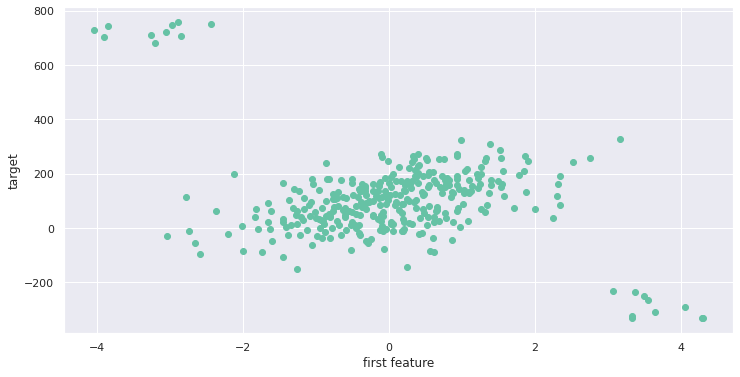

In [6]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train.T[0], y_train)
plt.xlabel('first feature')
plt.ylabel('target')
plt.show()

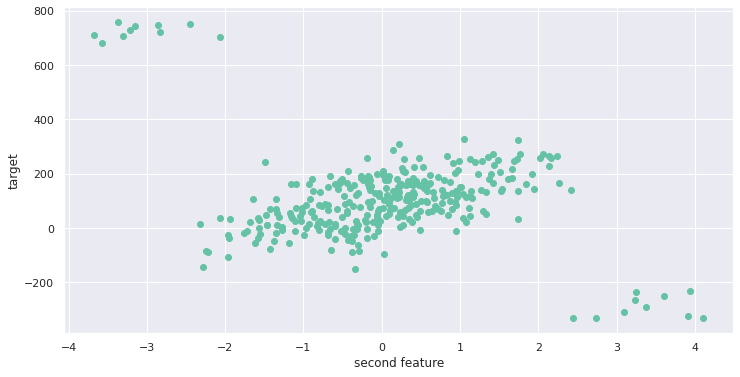

In [7]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train.T[1], y_train)
plt.xlabel('second feature')
plt.ylabel('target')
plt.show()

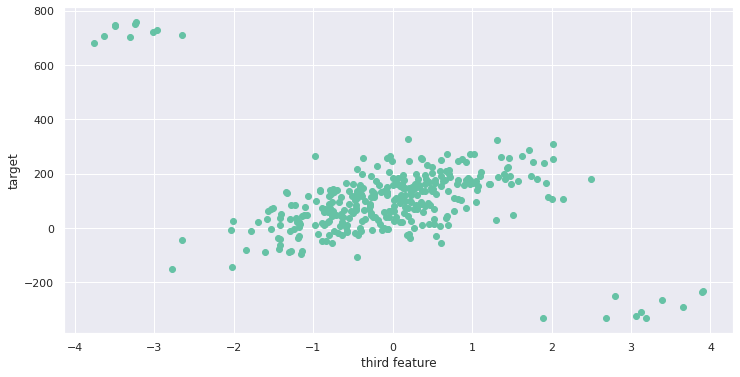

In [8]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train.T[2], y_train)
plt.xlabel('third feature')
plt.ylabel('target')
plt.show()

Вобщем и целом ситуация везде похожая. Хорошая линейная зависимость с двумя, симметричными массивами выбросов.

**2.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). Что можно сказать о качестве нашей модели?

Я считаю ваше предложение обучить простую регрессию лукавым. Мне кажеться надо обучать хотябы ридж, так как данные скорее всего линейно зависимы. Ну я сделаю и так и так. Но для начало исследуем линейную зависимость данных. Вдруг я не прав и вы меня не пытаеться обмануть. Нормализацию считаю, что можно не проводить, так как данные и так в раене 1.

In [9]:
eig = LA.eig(X_train.T@X_train)[0]
(max(eig)/min(eig))**0.5

1.867286972837237

Хм. Неужели вы меня не обманываете? Ну ладно. Будем считать, что использование обычной регресии обасновано.

Вообще, мне кажеться выбросы ни как не повлияют, так как они симметричны, но судя по тому, что вы привели такой пример я глубако заблуждаюсь.

In [10]:
model = LinearRegression().fit(X_train, y_train)
y_predict = model.predict(X_test)
print("MSE ",  MSE(y_predict, y_test))

MSE  17025.80661012894


Хочеться плакать

Видимо я дурак, так как не понимаю почему все так плохо. Ну ладно.

**3.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE. Что изменилось? 

In [11]:
model = HuberRegression().fit(X_train, y_train)

In [12]:
y_predict = model.predict(X_test)
print(MSE(y_predict, y_test))

22937.602788789318


Есть три варианта почему стало еще хуже 1) я облажался при написании класса 2) градиенту не хватило итераций 3) градиент выпал а пределы области в которой может сойтись.

Давайте посмотрим как ведет себя модель из коробки

In [18]:
huber = HuberRegressor(alpha=15).fit(X_train, y_train)
y_predict = huber.predict(X_test)
print(MSE(y_predict, y_test))

7809.700857592495


Лучше, чем у меня,  но все равно плохо

In [20]:
huber = HuberRegressor(alpha=1).fit(X_train, y_train)
y_predict = huber.predict(X_test)
print(MSE(y_predict, y_test))

80.01982345646105


Ага, значит дело в гипер параметре 

In [23]:
model = HuberRegression(c=1).fit(X_train, y_train)

In [24]:
y_predict = model.predict(X_test)
print(MSE(y_predict, y_test))

23007.865848691377


Не понимаю, в чем проблема. Ну ладно. Скорее всего у меня кривые руки. Далее буду использовать модель из коробки так как она работает как надо.

**4.** Используя поиск по сетке, подберите оптимальное значение гиперпараметра $c$ нашей модели. Какую метрику стоит использовать? Почему?

Я посоветовался с товарищами. Они предлагают использовать MAE. Я по правде говоря особой разници не вижу и буду использовать MSE, как дефолтной.

In [29]:
parameters_grid = {'alpha' : np.linspace(0, 1000, num=10000)}
gs = GridSearchCV(estimator=HuberRegressor(), param_grid = parameters_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10, error_score='raise')
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


GridSearchCV(error_score='raise', estimator=HuberRegressor(), n_jobs=-1,
             param_grid={'alpha': array([0.00000000e+00, 1.00010001e-01, 2.00020002e-01, ...,
       9.99799980e+02, 9.99899990e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error', verbose=10)

In [30]:
y_predict = gs.best_estimator_.predict(X_test)
print(MSE(y_predict, y_test))

9263.491056363335


Чет как-то вообще не очень. Давайте попробуем изменить метрику

In [31]:
parameters_grid = {'alpha' : np.linspace(0, 1000, num=10000)}
gs = GridSearchCV(estimator=HuberRegressor(), param_grid = parameters_grid, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=10, error_score='raise')
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


GridSearchCV(error_score='raise', estimator=HuberRegressor(), n_jobs=-1,
             param_grid={'alpha': array([0.00000000e+00, 1.00010001e-01, 2.00020002e-01, ...,
       9.99799980e+02, 9.99899990e+02, 1.00000000e+03])},
             scoring='neg_mean_absolute_error', verbose=10)

In [34]:
y_predict = gs.best_estimator_.predict(X_test)
print('MSE ',  MSE(y_predict, y_test))
print("MAE ", MAE(y_predict, y_test))


MSE  25.15468348945327
MAE  4.134866434833448


Воу. 

Я понял в чем дело. Проблема в том, что при испольозании MSE выбросы, буде они попадут в не нулевую область вносят намного больше вклад в изменения коэффициентов.

**5.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака. Что можно заметить на этих графиках?

In [35]:
y_predict = gs.best_estimator_.predict(X_train)

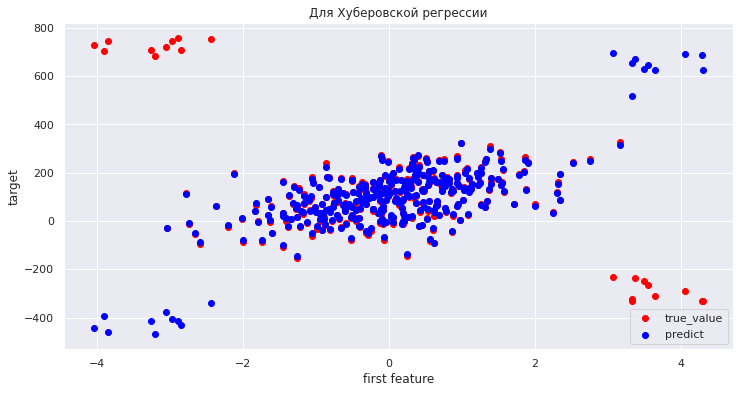

In [39]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train.T[0], y_train, c='red', label='true_value')
plt.scatter(X_train.T[0], y_predict, c='blue', label='predict')
plt.xlabel('first feature')
plt.ylabel('target')
plt.title('Для Хуберовской регрессии')
plt.legend()
plt.show()

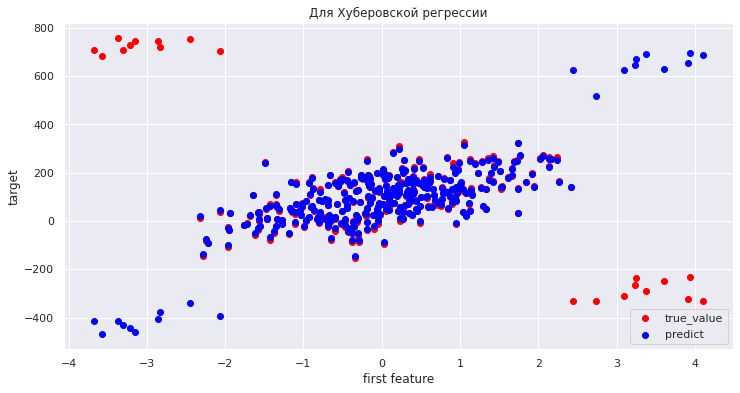

In [40]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train.T[1], y_train, c='red', label='true_value')
plt.scatter(X_train.T[1], y_predict, c='blue', label='predict')
plt.xlabel('second feature')
plt.ylabel('target')
plt.title('Для Хуберовской регрессии')
plt.legend()
plt.show()

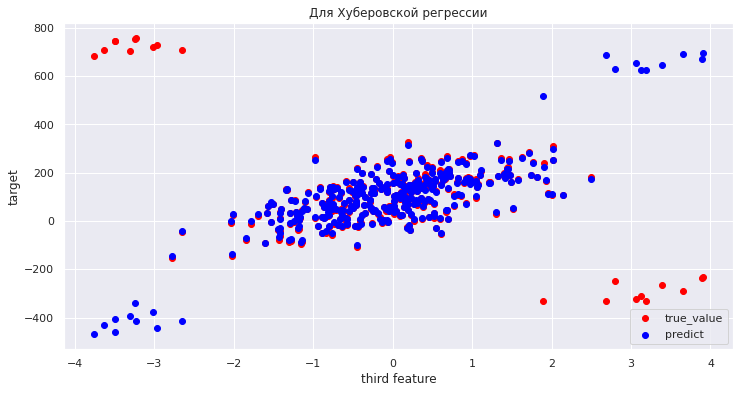

In [42]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train.T[2], y_train, c='red', label='true_value')
plt.scatter(X_train.T[2], y_predict, c='blue', label='predict')
plt.xlabel('third feature')
plt.ylabel('target')
plt.title('Для Хуберовской регрессии')
plt.legend()
plt.show()

In [43]:
model = LinearRegression().fit(X_train, y_train)
y_predict = model.predict(X_train)

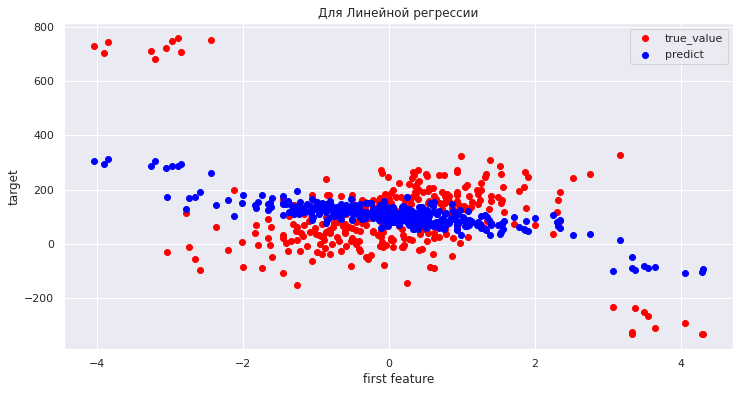

In [47]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train.T[0], y_train, c='red', label='true_value')
plt.scatter(X_train.T[0], y_predict, c='blue', label='predict')
plt.xlabel('first feature')
plt.ylabel('target')
plt.title('Для Линейной регрессии')
plt.legend()
plt.show()

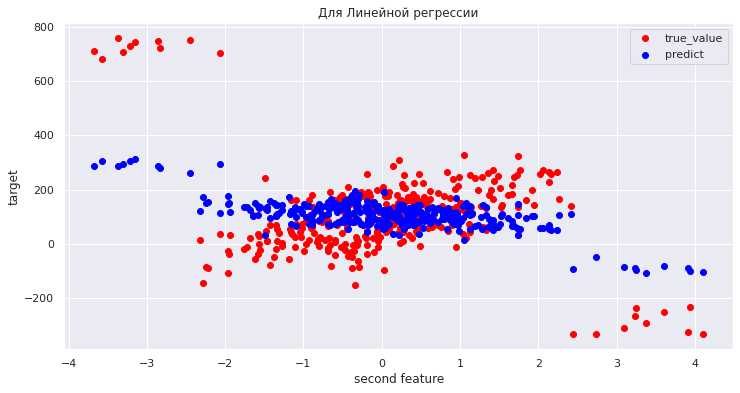

In [48]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train.T[1], y_train, c='red', label='true_value')
plt.scatter(X_train.T[1], y_predict, c='blue', label='predict')
plt.xlabel('second feature')
plt.ylabel('target')
plt.title('Для Линейной регрессии')
plt.legend()
plt.show()

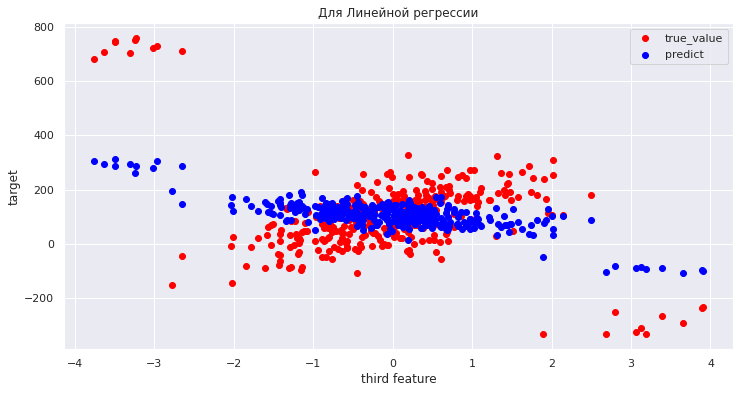

In [49]:
plt.figure(figsize = (12, 6))
plt.scatter(X_train.T[2], y_train, c='red', label='true_value')
plt.scatter(X_train.T[2], y_predict, c='blue', label='predict')
plt.xlabel('third feature')
plt.ylabel('target')
plt.title('Для Линейной регрессии')
plt.legend()
plt.show()

Понятно почему хубер лучше. Давайте посмотим на то, что предлагает Хубер если будем его минимизировать по MSE

In [50]:
parameters_grid = {'alpha' : np.linspace(0, 1000, num=10000)}
gs = GridSearchCV(estimator=HuberRegressor(), param_grid = parameters_grid, scoring='neg_mean_squared_error', n_jobs=-1, verbose=10, error_score='raise')
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


GridSearchCV(error_score='raise', estimator=HuberRegressor(), n_jobs=-1,
             param_grid={'alpha': array([0.00000000e+00, 1.00010001e-01, 2.00020002e-01, ...,
       9.99799980e+02, 9.99899990e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error', verbose=10)

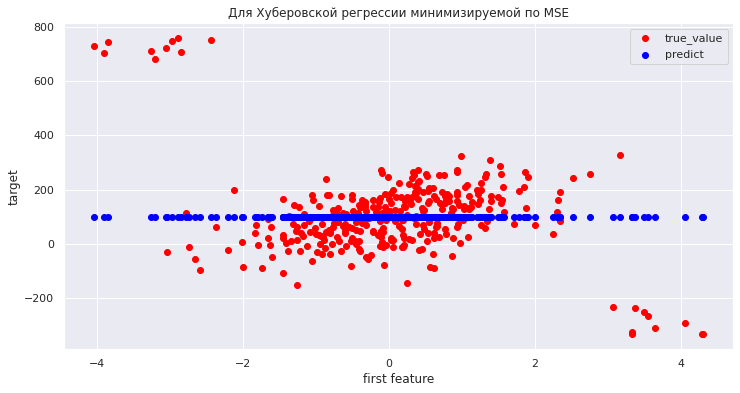

In [51]:
y_predict = gs.best_estimator_.predict(X_train)
plt.figure(figsize = (12, 6))
plt.scatter(X_train.T[0], y_train, c='red', label='true_value')
plt.scatter(X_train.T[0], y_predict, c='blue', label='predict')
plt.xlabel('first feature')
plt.ylabel('target')
plt.title('Для Хуберовской регрессии минимизируемой по MSE')
plt.legend()
plt.show()

Видно, что здесь из-за сильного влияния выбросов прямую развернуло

**Вывод:** Чтобы выбросы не влияли на линейную регрессию они должны быть симметричны относительно прямой, а не относительно центра прямой. Выбросы это плохо. И если они существенны, надо использовать специальную регрессию для обучения можели